In [132]:
import numpy as np
import pandas as pd

from collections import Counter

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Read data from file into a pandas dataframe

In [119]:
df = pd.read_csv('voice.csv')

print np.shape(df)
print df.columns

(3168, 21)
Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')


### Let's look at the first few data points. 

In [126]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [127]:
df_male = df[df['label'] == 'male']
df_female = df[df['label'] == 'female']

### Let's split the data into training, validation, and test set. 

Train - 70%, 
Validation - 10%, 
Test - 20%

In [128]:
X = df.loc[:, 'meanfreq':'modindx']
y = df.loc[:, 'label']

x_full_train, x_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_full_train, y_full_train, test_size=0.125, random_state=42)

In [129]:
print np.shape(x_full_train)
print np.shape(x_train)
print np.shape(x_val)
print np.shape(x_test)

(2534, 20)
(2217, 20)
(317, 20)
(634, 20)


Train - 2217 samples, 
Validation - 317 samples, 
Test - 634 samples

In [144]:
print "Full training set class distribution: Male %d, Female %d " %(Counter(y_full_train)['male'], 
                                                                    Counter(y_full_train)['female'])
print "Train set class distribution:         Male %d, Female %d " %(Counter(y_train)['male'], 
                                                                    Counter(y_train)['female'])
print "Validation set class distribution:    Male %d, Female %d " %(Counter(y_val)['male'], 
                                                                    Counter(y_val)['female'])
print "Test set class distribution:          Male %d, Female %d " %(Counter(y_test)['male'], 
                                                                    Counter(y_test)['female'])

Full training set class distribution: Male 1247, Female 1287 
Train set class distribution:         Male 1086, Female 1131 
Validation set class distribution:    Male 161, Female 156 
Test set class distribution:          Male 337, Female 297 


In [10]:
# Fit a gradient boosted classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)
gbc.fit(x_train, y_train)
preds = gbc.predict(x_test)
print accuracy_score(y_test, preds)

0.976866456362


In [12]:
# Fit a random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
preds = rf.predict(x_test)
print accuracy_score(y_test, preds)

0.981072555205


In [15]:
# Fit a logistic regression model
logreg = linear_model.LogisticRegression(C=1e5, penalty='l2')
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
print accuracy_score(y_test, preds)

0.969505783386


In [16]:
# Fit an svm classifier)
svmclf = svm.SVC()
svmclf.fit(x_train, y_train)
preds = svmclf.predict(x_test)
print accuracy_score(y_test, preds)

0.712933753943


In [20]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [45]:
df_male.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430
std,0.026254,0.009455,0.037392,0.031999,0.024050,0.020415,5.135190,163.115940,0.028938,0.150473,0.084024,0.026254,0.017179,0.015749,0.036003,0.445997,0.049199,3.000285,3.000605,0.130132
min,0.039363,0.041747,0.010975,0.000240,0.042946,0.021841,0.326033,2.068455,0.786650,0.080963,0.000000,0.039363,0.055565,0.010953,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.155625,0.058957,0.149952,0.101205,0.211918,0.100960,1.461931,5.003020,0.899557,0.363316,0.098914,0.155625,0.104171,0.017719,0.246154,0.399170,0.007812,1.759766,1.751953,0.099184
50%,0.176343,0.061781,0.180612,0.122315,0.228117,0.109940,1.880420,6.970088,0.917309,0.461636,0.157557,0.176343,0.117254,0.036166,0.271186,0.686687,0.023438,4.457031,4.429688,0.139904
75%,0.190593,0.070915,0.202362,0.136044,0.244819,0.119331,2.645467,12.282596,0.936048,0.576902,0.228117,0.190593,0.128236,0.047572,0.277457,1.032536,0.031250,6.035156,6.000000,0.212205
max,0.225582,0.096030,0.248840,0.226740,0.268924,0.196168,34.537488,1271.353628,0.981997,0.831347,0.280000,0.225582,0.179051,0.121212,0.279070,2.805246,0.458984,21.867188,21.843750,0.932374


In [44]:
df_female.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
std,0.029960,0.018380,0.032149,0.049767,0.023121,0.042924,3.091454,97.669114,0.047288,0.179854,0.067175,0.029960,0.018460,0.021845,0.021529,0.576884,0.072739,3.854042,3.856124,0.107639
min,0.078847,0.018363,0.035114,0.000229,0.127637,0.014558,0.141735,2.209673,0.738651,0.036876,0.000000,0.078847,0.091912,0.009775,0.163934,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.177031,0.034977,0.181021,0.157892,0.206280,0.031106,1.962717,6.764500,0.839784,0.208125,0.168883,0.177031,0.157395,0.019116,0.258065,0.450566,0.023438,2.560547,2.435547,0.101201
50%,0.192732,0.041965,0.198226,0.175373,0.223744,0.042689,2.435808,9.607635,0.865861,0.277228,0.193670,0.192732,0.169408,0.047013,0.274286,0.867405,0.023438,6.042969,5.964844,0.138995
75%,0.211981,0.060452,0.216214,0.195243,0.241486,0.061268,3.086396,14.448639,0.908557,0.478122,0.218152,0.211981,0.181832,0.048534,0.277457,1.338521,0.140625,8.607422,8.531250,0.201557
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.978482,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.449219,21.796875,21.773438,0.857764


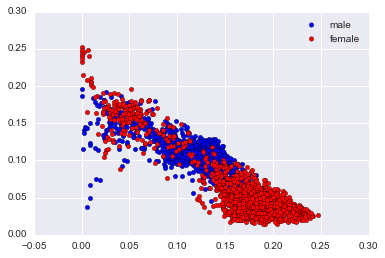

In [17]:
# Visualizations Q25 vs IQR

plt.scatter(df_male.loc[:,'Q25'], df_male.loc[:,'IQR'], c = 'b', s = 20,label = "male")
plt.scatter(df_female.loc[:,'Q25'], df_female.loc[:,'IQR'], c = 'r',s = 20,label = "female")
plt.legend()
plt.show()


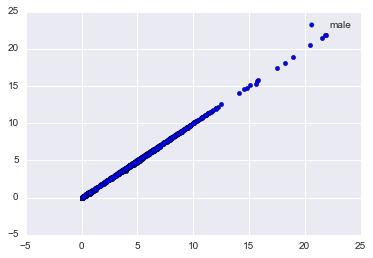

In [19]:
# Visualizations Q25 vs IQR

plt.scatter(df_male.loc[:,'maxdom'], df_male.loc[:,'dfrange'], c = 'b', s = 20,label = "male")
plt.scatter(df_female.loc[:,'maxdom'], df_female.loc[:,'dfrange'], c = 'r',s = 20,label = "female")
plt.legend()
plt.show()


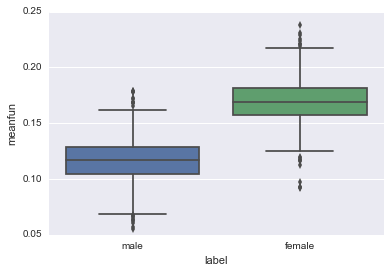

In [37]:
sns.boxplot(x="label", y="meanfun", data=df)
#plt.savefig("meanfun.png")

In [20]:
# Predictions based on meanfun threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'meanfun'] > 0.140:
        preds[i] = 'female'
    else:
        preds[i] = 'male'

print accuracy_score(y, preds)

0.952335858586


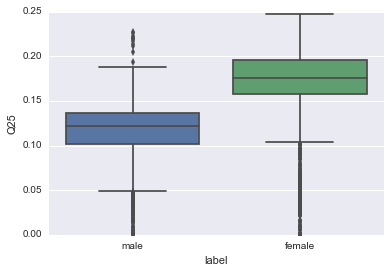

In [21]:
sns.boxplot(x="label", y="Q25", data=df)
plt.savefig("box_Q25.png")

In [22]:
# Predictions based on Q25 threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'Q25'] > 0.145:
        preds[i] = 'female'
    else:
        preds[i] = 'male'

print accuracy_score(y, preds)

0.864267676768


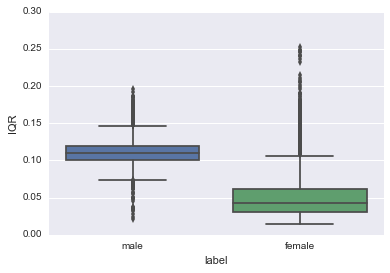

In [23]:
sns.boxplot(x="label", y="IQR", data=df)
plt.savefig("box_IQR.png")

In [24]:
# Predictions based on IQR threshold

preds = [None] * 3168

for i in xrange(3168):
    if X.loc[i, 'IQR'] > 0.09:
        preds[i] = 'male'
    else:
        preds[i] = 'female'

print accuracy_score(y, preds)

0.875315656566


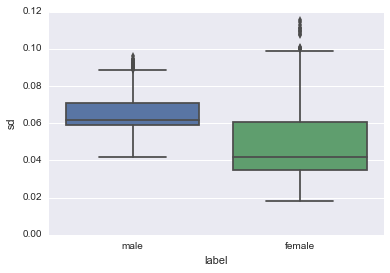

In [47]:
sns.boxplot(x="label", y="sd", data=df)

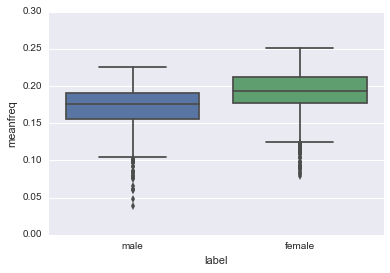

In [46]:
sns.boxplot(x="label", y="meanfreq", data=df)

In [101]:
def perceptron(X, y, maxsteps=100, random=False):
    y_new = np.zeros(len(y))
    y_new = [1  if k=='female' else -1 for k in y]
    y = y_new
    
    w = np.random.rand(np.shape(X)[1],)
    i = 1
    count_best = len(y) + 1
    while i <= maxsteps:
        count = 0                     # counter for no. of misclassified points in the current iteration
        if not random:
            for j in xrange(len(y)):             # iterate over the data points
                if (y[j] * np.dot(X[j,:], w) ) < 0.: # if the data point is misclassified
                    w = w + y[j]*X[j,:]     # update the weight vector
                    count += 1            # increment counter
        else:                         # random case
            indices = np.random.permutation(len(y))
            for j in indices:
                if (y[j] * np.dot(X[j,:], w) ) < 0.: # if the data point is misclassified
                    w = w + y[j]*X[j,:]     # update the weight vector
                    count += 1            # increment counter
        
        if count < count_best:         # save the best weights
            w_best = w
            count_best = count
        
        if count == 0:                 # if there are no misclassifications in the most recent iteration, then stop
            print "No. of iterations taken to converge: ", i
            break
        i += 1
    
    if i > maxsteps:
        print "Perceptron did not converge in the given maximum iterations: ", maxsteps
    
    return w_best, count_best

In [102]:
w_perceptron, count = perceptron(np.array(x_train), np.array(y_train), maxsteps = 1000)

Perceptron did not converge in the given maximum iterations:  1000


In [104]:
accuracy_w_perceptron

array([   933.73830066,  -1423.47991648,   1825.37221637,   6008.32242207,
        -2358.86431311,  -8366.50018697,   1069.77616068,     27.91802421,
        -5970.28338589,   1674.33882424,  -1190.16012593,    934.17174864,
        17030.6365342 ,    170.48700134,   2103.74475817,    166.55128161,
          704.95121168,    282.37296765,   -422.89013426,    554.80323803])

In [105]:
count

562

In [108]:
np.shape(X)

(3168, 20)

In [110]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(copy=True, n_components=10, whiten=False)

In [113]:
pca.explained_variance_ratio_

array([  9.98681426e-01,   1.26737277e-03,   4.33224331e-05,
         5.10376822e-06,   1.55499832e-06,   5.21662441e-07,
         2.66187444e-07,   1.79716734e-07,   8.75488379e-08,
         5.77831077e-08])

In [116]:
sum(pca.explained_variance_ratio_[:3])

0.99999212089752576